# 국내 최대 이커머스 기업의 개인정보 보호 문제 해결 방안

## 배경

우리는 국내 최대의 이커머스 플랫폼에서 백엔드 개발자로 근무하고 있습니다. 이 플랫폼은 고객의 상품이나 서비스에 대한 문의를 신속하게 처리하고, 이러한 문의와 피드백을 공개적으로 공유함으로써 커뮤니티 구성원 모두에게 가치를 제공하는 것을 목표로 하고 있습니다. 이러한 접근 방식은 많은 고객들로부터 긍정적인 반응을 이끌어내며, 플랫폼의 사용자 기반을 확장하는 데 큰 역할을 하였습니다.

## 문제 상황

그러나 최근 들어 한 가지 문제가 발생하기 시작했습니다. 일부 고객이 상품이나 서비스에 대한 문의를 할 때, 본의 아니게 자신의 개인정보(예: 전화번호, 주소, 이메일 등)를 포함시키는 일이 발생하고 있습니다. 이러한 정보가 공개적으로 공유될 경우, 해당 고객의 개인정보가 노출되어 다양한 피해로 이어질 가능성이 있습니다.

## 해결책 모색

이 문제를 해결하기 위해, 우리는 고객이 문의를 작성할 때 개인정보를 포함하고 있는지 자동으로 감지하고 필터링하는 시스템을 개발하기로 결정했습니다. 이 시스템은 정규표현식(Regular Expression)을 활용하여 특정 패턴의 문자열(전화번호, 이메일 주소 등)을 식별하고, 이를 자동으로 제거하거나 마스킹 처리할 것입니다.

## 구현 계획

1. **정규표현식 학습:** 우선, 개발 팀은 다양한 형태의 개인정보(전화번호, 이메일 주소 등)를 식별할 수 있는 정규표현식을 학습하고 개발할 필요가 있습니다.
2. **자동 필터링 시스템 개발:** 이 정규표현식을 기반으로, 사용자의 입력을 실시간으로 검사하고 개인정보가 포함된 부분을 찾아내어 제거하거나 마스킹하는 기능을 구현합니다.
3. **시스템 테스트 및 최적화:** 개발된 시스템은 다양한 시나리오에서의 효율성과 정확성을 검증하기 위해 광범위하게 테스트될 필요가 있습니다. 또한, 정확도를 최적화하고 잘못된 감지(false positives)를 최소화하기 위한 조정 작업이 필요합니다.

## 기대 효과

이 시스템을 성공적으로 구현함으로써, 우리는 고객의 개인정보를 보호하고 피해를 방지하는 한편, 고객들이 안심하고 문의를 남길 수 있는 안전한 커뮤니케이션 환경을 제공할 수 있을 것입니다. 이를 통해 플랫폼의 신뢰성과 고객 만족도를 높이는 데 기여할 것으로 기대됩니다.


In [ ]:
# 고객 문의 사항 예시
data = """
안녕하세요!
멋사 제품을 항상 저를 만족시킵니다.
상당히 잘 사용하고 있는데 제가 멤버쉽에 잘 가입되었는지 궁금합니다.
제 이름은 홍길동이고 주민번호는 900101-1234567 이며 전화번호는 010-1234-5678입니다.
확인 부탁드립니다!
"""

solution1

In [ ]:
# 900101-1234567 -> 900101-*******
# 단어 단어를 쪼개서 그 부분이
# 14개의 문자로 이어진 부분이 있으면
# - 구분하고 앞부분, 뒷부분이 숫자이면
# 주민등록번호라고 의심을 해서
# 마스킹을 하겠습니다.
result =[]
tmp =''
for line in data.split("\n"): # \n : 개행문자. 줄바꿈.
  word_result = []
  for word in line.split(' '):
    if len(word) ==14 and word[:6].isdigit() and word[-7:].isdigit() :
      word = word[:6] +"-*******"
    word_result.append(word)
  result.append(" ".join(word_result))
print("\n".join(result))


안녕하세요!
멋사 제품을 항상 저를 만족시킵니다.
상당히 잘 사용하고 있는데 제가 멤버쉽에 잘 가입되었는지 궁금합니다.
제 이름은 홍길동이고 주민번호는 900101-******* 이며 전화번호는 010-1234-5678입니다.
확인 부탁드립니다!



solution2

In [ ]:
import re

p = re.compile("(\d{6})[-]\d{7}")
print(p.sub("\g<1>-*******", data))


안녕하세요!
멋사 제품을 항상 저를 만족시킵니다.
상당히 잘 사용하고 있는데 제가 멤버쉽에 잘 가입되었는지 궁금합니다.
제 이름은 홍길동이고 주민번호는 900101-******* 이며 전화번호는 010-1234-5678입니다.
확인 부탁드립니다!



문자열 매칭

In [ ]:
import re

In [ ]:
pattern = re.compile("ab")

In [ ]:
print(pattern.match("ab"))
print(pattern.match("aab"))
print(pattern.match("abb"))

<re.Match object; span=(0, 2), match='ab'>
None
<re.Match object; span=(0, 2), match='ab'>


. 을 이용한 매칭 : 줄바꿈을 제외한 다른 문자 하나를 의미

In [ ]:
p = re.compile("a.b")
print(p.match("abb"))
print(p.match("ab"))
print(p.match("acb"))
print(p.match("a?b"))
print(p.match("a\nb"))

<re.Match object; span=(0, 3), match='abb'>
None
<re.Match object; span=(0, 3), match='acb'>
<re.Match object; span=(0, 3), match='a?b'>
None


'*' 반복 (0번 반복도 포함)

In [ ]:
p = re.compile("a*b")
print(p.match("abb"))
print(p.match("ab"))
print(p.match("bbbbbbbbbbb"))
print(p.match("aaaaaaaaaaaab"))
print(p.match("a?b"))
print(p.match("a\nb"))

<re.Match object; span=(0, 2), match='ab'>
<re.Match object; span=(0, 2), match='ab'>
<re.Match object; span=(0, 1), match='b'>
<re.Match object; span=(0, 13), match='aaaaaaaaaaaab'>
None
None


'+' 반복 (0번 반복 포함 X)

In [ ]:
p = re.compile("a+b")
print(p.match("abb"))
print(p.match("ab"))
print(p.match("bbbbbbbbbbb"))
print(p.match("aaaaaaaaaaaab"))
print(p.match("a?b"))
print(p.match("a\nb"))

<re.Match object; span=(0, 2), match='ab'>
<re.Match object; span=(0, 2), match='ab'>
None
<re.Match object; span=(0, 13), match='aaaaaaaaaaaab'>
None
None


'{}'반복

In [ ]:
p = re.compile("a{4}b")
print(p.match("abb"))
print(p.match("ab"))
print(p.match("aaaabbbbbbbbbbb"))
print(p.match("aaaaaaaaaaaab"))
print(p.match("a?b"))
print(p.match("a\nb"))

None
None
<re.Match object; span=(0, 5), match='aaaab'>
None
None
None


In [ ]:
p = re.compile("a{2,4}b")
print(p.match("abb"))
print(p.match("aab"))
print(p.match("aaab"))
print(p.match("aaaab"))
print(p.match("aaaaab"))

None
<re.Match object; span=(0, 3), match='aab'>
<re.Match object; span=(0, 4), match='aaab'>
<re.Match object; span=(0, 5), match='aaaab'>
None


'?'반복 : 0 또는 1회 반복

In [ ]:
p = re.compile("a?b")
print(p.match("bb"))
print(p.match("abb"))
print(p.match("aabb"))

<re.Match object; span=(0, 1), match='b'>
<re.Match object; span=(0, 2), match='ab'>
None


단어 패턴 인식

In [ ]:
p = re.compile("[a-z]+")
print(p.match("aabb"))
print(p.match("hello world"))
print(p.match("Hello world"))
print(p.match("3 hello world"))

<re.Match object; span=(0, 4), match='aabb'>
<re.Match object; span=(0, 5), match='hello'>
None
None


search

In [ ]:
p = re.compile("[a-z]+")
print(p.search("aabb"))
print(p.search("hello world"))
print(p.search("Hello world"))
print(p.search("3 hello world"))

<re.Match object; span=(0, 4), match='aabb'>
<re.Match object; span=(0, 5), match='hello'>
<re.Match object; span=(1, 5), match='ello'>
<re.Match object; span=(2, 7), match='hello'>


findall

In [ ]:
p = re.compile("[a-z]+")
print(p.findall("aabb"))
print(p.findall("hello world"))
print(p.findall("Hello world"))
print(p.findall("3 hello world"))

['aabb']
['hello', 'world']
['ello', 'world']
['hello', 'world']


finditer

In [ ]:
p = re.compile("[a-z]+")
p.finditer("2024 Like Lion Python backend")

In [ ]:
outputs = p.finditer("2024 Like Lion Python backend")
for output in outputs:
  print(output)

<re.Match object; span=(6, 9), match='ike'>
<re.Match object; span=(11, 14), match='ion'>
<re.Match object; span=(16, 21), match='ython'>
<re.Match object; span=(22, 29), match='backend'>


In [ ]:
output.span()

(22, 29)

In [ ]:
output.group()

'backend'

숫자

In [ ]:
p = re.compile("\d+")
outputs = p.finditer("2024 Like Lion Python backend")
for output in outputs:
  print(output)

<re.Match object; span=(0, 4), match='2024'>


In [ ]:
p = re.compile("\d+.\d+")
outputs = p.finditer("pi : 3.141592 e : 2.76")
for output in outputs:
  print(output)

<re.Match object; span=(5, 13), match='3.141592'>
<re.Match object; span=(18, 22), match='2.76'>


한글 인식

In [ ]:
data = """
안녕하세요!
멋사 제품을 항상 저를 만족시킵니다.
상당히 잘 사용하고 있는데 제가 멤버쉽에 잘 가입되었는지 궁금합니다.
제 이름은 홍길동이고 주민번호는 900101-1234567 이며 전화번호는 010-1234-5678입니다.
확인 부탁드립니다!
"""
p = re.compile('[가-힣]+')
p.finditer(data)

옵션 IGNORECASE, I

In [ ]:
p = re.compile("[a-zA-Z]+")
print(p.findall("aabb"))
print(p.findall("hello world"))
print(p.findall("Hello world"))
print(p.findall("3 hello world"))

['aabb']
['hello', 'world']
['Hello', 'world']
['hello', 'world']


In [ ]:
p = re.compile("[a-z]+", re.I)
print(p.findall("aabb"))
print(p.findall("hello world"))
print(p.findall("Hello world"))
print(p.findall("3 hello world"))

['aabb']
['hello', 'world']
['Hello', 'world']
['hello', 'world']


옵션 MULTILINE, M

In [ ]:
txt = """like lion
python backend
like tiger"""
p = re.compile("^like\s\w+",re.M ) # [a-z]+
print(p.findall(txt))

['like lion', 'like tiger']


메타문자 : |

In [ ]:
p = re.compile("hello|good")
p.match("good world")

<re.Match object; span=(0, 4), match='good'>

메타문자 $ : 마지막

In [ ]:
print(txt)

like lion
python backend
like tiger


In [ ]:
p= re.compile("tiger$")
print(p.search(txt))

<re.Match object; span=(30, 35), match='tiger'>


In [ ]:
re.search("tiger$", txt)

<re.Match object; span=(30, 35), match='tiger'>

메타문자 : \b : 공백

In [ ]:
txt="""like lion
lion good
python backend
like tiger"""

In [ ]:
p =  re.compile('\blion')
p.findall(txt)

[]

In [ ]:
p =  re.compile('\\blion')
p.findall(txt)

['lion', 'lion']

In [ ]:
p =  re.compile(r'\blion')
p.findall(txt)

['lion', 'lion']

그룹핑

In [ ]:
p = re.compile('python+')
print(p.search('python'))
print(p.search('pythonnn'))
print(p.search('pythonpython'))

<re.Match object; span=(0, 6), match='python'>
<re.Match object; span=(0, 8), match='pythonnn'>
<re.Match object; span=(0, 6), match='python'>


In [ ]:
p = re.compile('(python)+')
print(p.search('python'))
print(p.search('pythonnn'))
print(p.search('pythonpython'))

<re.Match object; span=(0, 6), match='python'>
<re.Match object; span=(0, 6), match='python'>
<re.Match object; span=(0, 12), match='pythonpython'>


검색 조건 추가

In [ ]:
p = re.compile(".+:")
m = p.search("http://www.naver.com")
m.group()

'http:'

In [ ]:
p = re.compile(".+(?=:)")
m = p.search("http://www.naver.com")
m.group()

'http'

In [ ]:
p = re.compile(".*[.](?!txt$)", re.M)
p.findall("""
my_docs.txt
my_excel.xls
my_word.doc
""")

['my_excel.', 'my_word.']

문자열 바꾸기

In [ ]:
p = re.compile('(blue|white|red)')
p.sub('color', 'blue sky and yellow snow, red apple')

'color sky and yellow snow, color apple'

# 다음주 목요일부터는 첫번째 프로젝트
- 개인 프로젝트
- 서비스를 웹 배포
- 개발한 코드를 공유해 주시면 제가 배포

# 이번주 금요일
- 새로이 배운 라이브러리 이용하여 나만의 기능 구현하기




# A 기업의 클라우드 서비스 전략 수립을 위한 데이터 시각화 레포트 서비스 개발

## 배경

인공지능(AI)과 빅데이터 기술의 급속한 발전으로 인해 전 세계의 기술 및 비즈니스 환경이 크게 변화하고 있습니다. 클라우드 컴퓨팅 산업은 이러한 변화의 최전선에 있으며, 데이터의 처리, 저장, 그리고 접근성을 향상시켜 기업들이 보다 효율적으로 운영될 수 있도록 지원합니다.

A 기업은 자체 클라우드 기반 솔루션의 개발 및 제공을 통해 시장에서 빠르게 성장하고 있으며, 지속적인 성장과 시장 내 위치 강화를 목표로 차별화된 전략 수립을 추구합니다.

## 현재의 도전

- **전략 수립의 신뢰성 문제:** 기존에는 경영진의 직관과 경험에 주로 의존해 왔지만, 이는 때로는 신뢰성과 객관성이 결여된 결정을 초래할 수 있습니다.
- **데이터 기반 의사 결정의 필요성:** 현대 비즈니스 환경에서는 대량의 데이터 분석을 통해 시장 동향과 소비자 행동을 정확히 파악하고 예측하는 것이 필수적입니다.

## 개발 의뢰

A 기업의 경영진은 IT 개발팀에 다음과 같은 요구를 제시했습니다:

- **데이터 시각화 레포트 서비스 개발:** 클라우드 사용 데이터, 고객 행동 분석, 시장 동향 등 다양한 데이터 소스에서 수집된 정보를 직관적이고 이해하기 쉬운 형태로 제공해야 합니다.

## 목표

- **Matplotlib 등의 시각화 도구 사용:** 데이터의 복잡성을 단순화하고, 경영진이 데이터에 기반한 명확한 인사이트를 얻을 수 있도록 지원합니다.
- **경쟁 우위 확보 및 브랜드 이미지 강화:** 효과적인 데이터 분석 및 시각화를 통해 A 기업은 시장 내 경쟁 우위를 확보하고, 브랜드 이미지를 강화할 수 있습니다.
- **지속 가능한 성장 도모:** 정확한 데이터 분석을 기반으로 한 전략 수립을 통해 지속 가능한 성장을 이루어나갈 수 있습니다.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
np.random.rand(10)

array([0.0263661 , 0.45899384, 0.74190343, 0.28088828, 0.74103162,
       0.97762817, 0.06929435, 0.03473687, 0.46320138, 0.43978315])

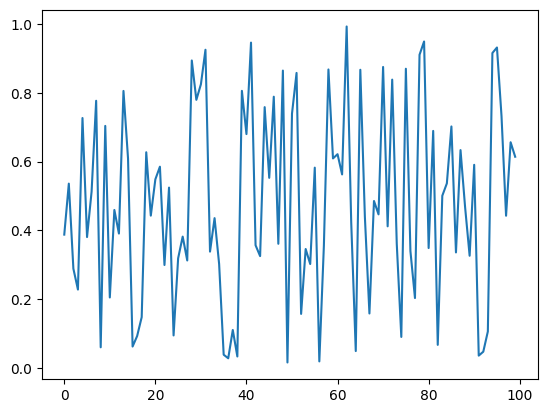

In [ ]:
plt.plot(np.random.rand(100))
plt.show()

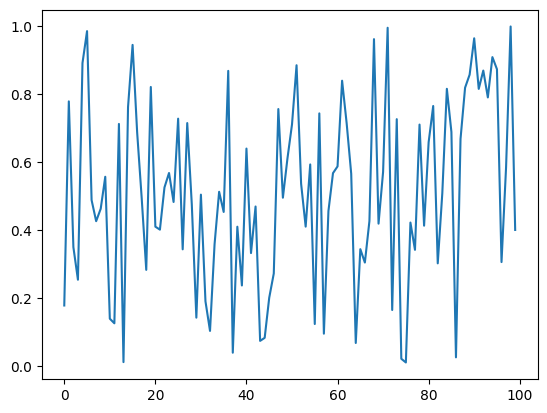

In [ ]:
plt.plot(np.random.rand(100));

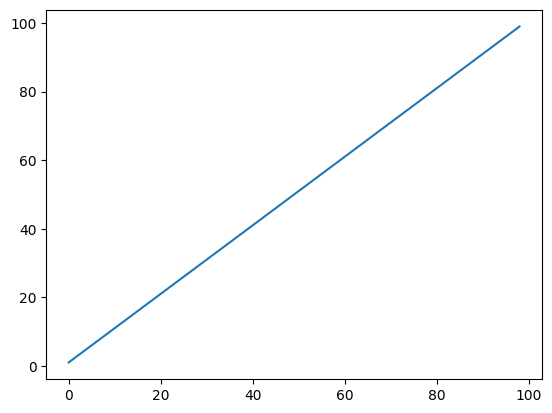

In [ ]:
plt.plot(list(np.arange(1, 100)));

In [ ]:
x = np.arange(0, 10, 0.01)

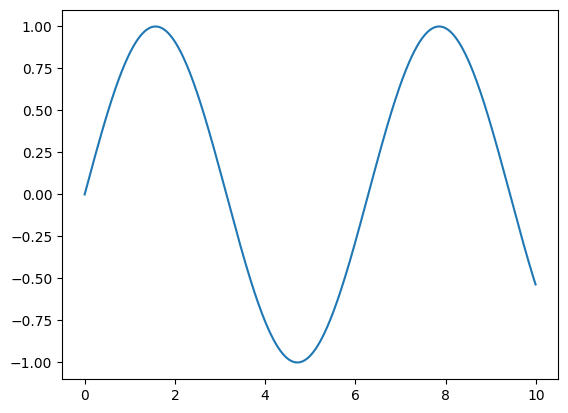

In [ ]:
plt.plot(x, np.sin(x))

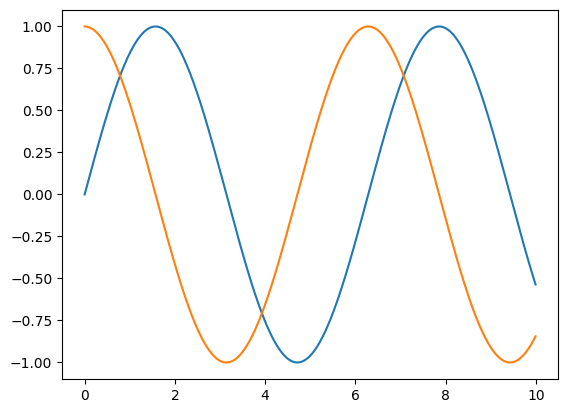

In [ ]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

라인 스타일
- '-' 'solid'
- '--' 'dashed'
- '-.' 'dashdot'
- ':' 'dotted'

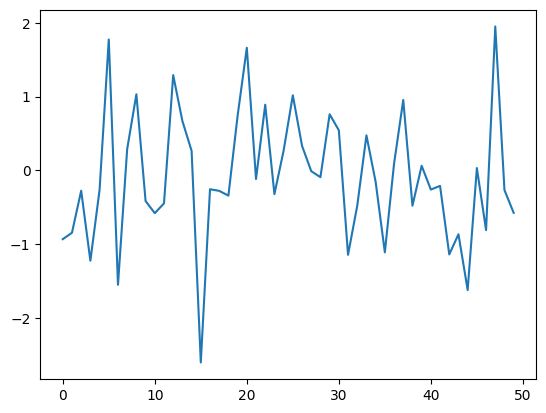

In [ ]:
plt.plot(np.random.randn(50), linestyle='solid')

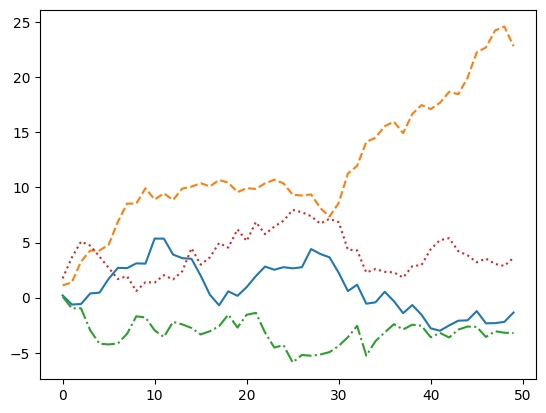

In [ ]:
plt.plot(np.random.randn(50).cumsum(), linestyle='solid')
plt.plot(np.random.randn(50).cumsum(), linestyle='dashed')
plt.plot(np.random.randn(50).cumsum(), linestyle='dashdot')
plt.plot(np.random.randn(50).cumsum(), linestyle='dotted')

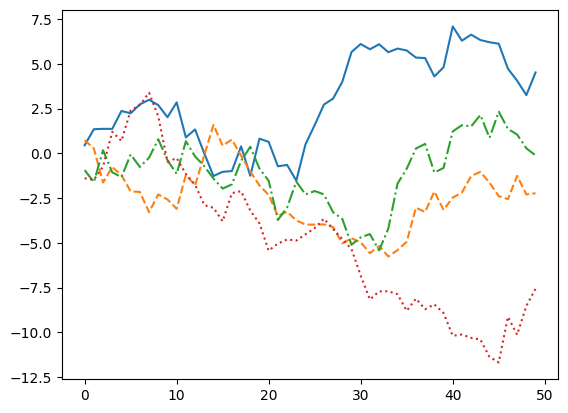

In [ ]:
plt.plot(np.random.randn(50).cumsum(), linestyle='-')
plt.plot(np.random.randn(50).cumsum(), linestyle='--')
plt.plot(np.random.randn(50).cumsum(), linestyle='-.')
plt.plot(np.random.randn(50).cumsum(), linestyle=':')

색상 스타일
- 'b' - blue
- 'g' - green
- 'r' - red
- 'c' - cyan
- 'm' - magenta
- 'y' - yellow
- 'k' - black
- 'w' - white

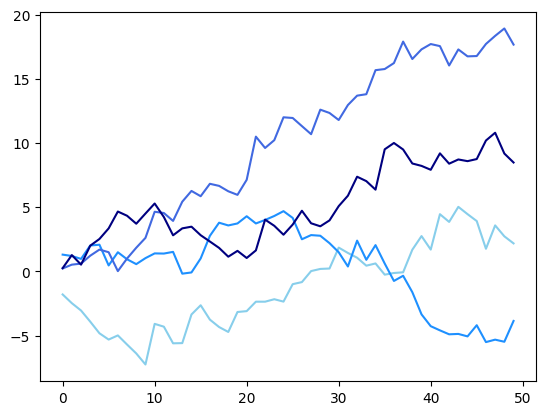

In [ ]:
plt.plot(np.random.randn(50).cumsum(), color='skyblue')
plt.plot(np.random.randn(50).cumsum(), color='dodgerblue')
plt.plot(np.random.randn(50).cumsum(), color='royalblue')
plt.plot(np.random.randn(50).cumsum(), color='navy')

Axis

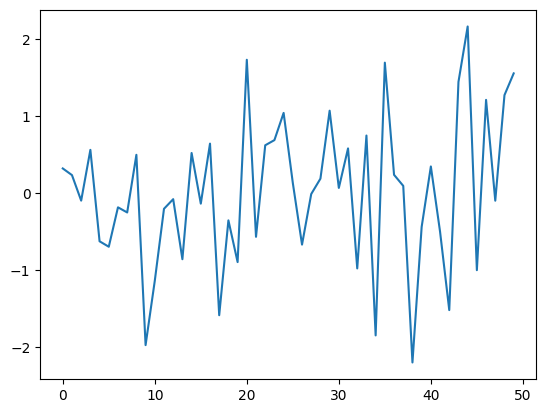

In [ ]:
plt.plot(np.random.randn(50))

(-5.0, 5.0)

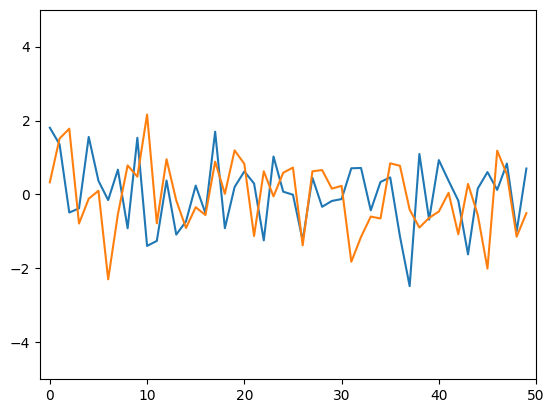

In [ ]:
plt.plot(np.random.randn(50))
plt.plot(np.random.randn(50))

plt.xlim(-1, 50)
plt.ylim(-5,5)

label

Text(0, 0.5, 'usage')

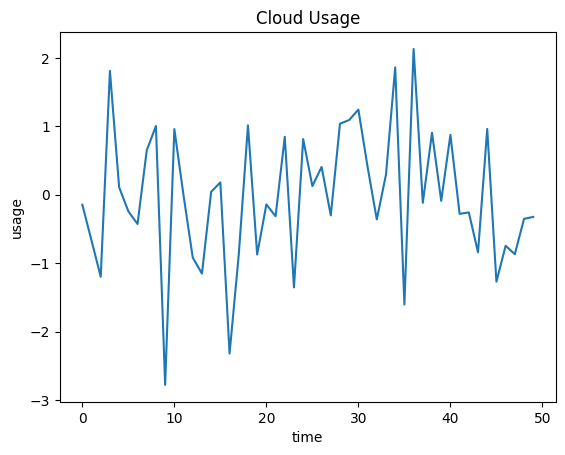

In [ ]:
plt.plot(np.random.randn(50))
plt.title("Cloud Usage")
plt.xlabel("time")
plt.ylabel('usage')

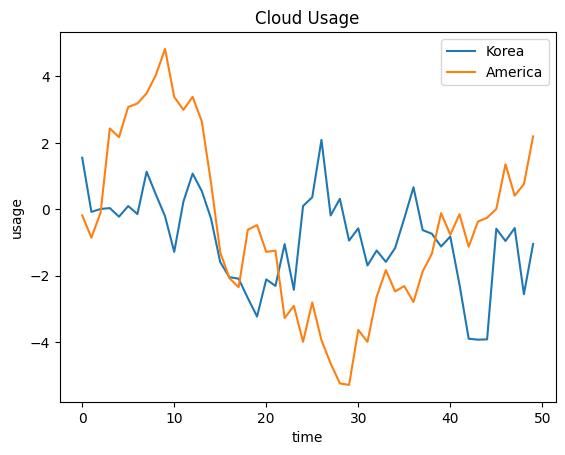

In [ ]:
plt.plot(np.random.randn(50).cumsum(), label='Korea')
plt.plot(np.random.randn(50).cumsum(), label='America')
plt.title("Cloud Usage")
plt.xlabel("time")
plt.ylabel('usage')
plt.legend()

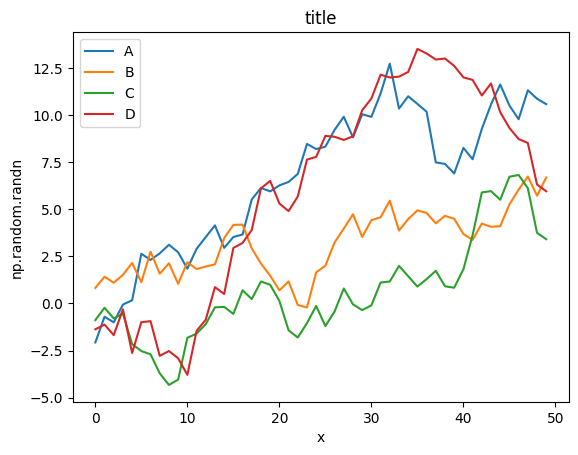

In [ ]:
plt.plot(np.random.randn(50).cumsum(), label='A')
plt.plot(np.random.randn(50).cumsum(), label='B')
plt.plot(np.random.randn(50).cumsum(), label='C')
plt.plot(np.random.randn(50).cumsum(), label='D')

plt.title('title')
plt.xlabel('x')
plt.ylabel('np.random.randn')
plt.legend();

범례 Legend
- 0 : best
- 1 : upper right
- 2 : upper left
- 3 : lower left
- 4 : lower right
- 5 : right
- 6 : center left
- 7 : center right
- 8 : lower center
- 9 : upper center

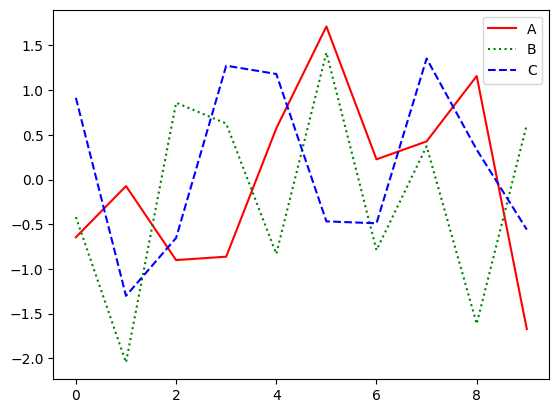

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.random.randn(10), '-r',label='A')
ax.plot(np.random.randn(10), ':g',label='B')
ax.plot(np.random.randn(10), '--b',label='C')
ax.axis('tight')
ax.legend();

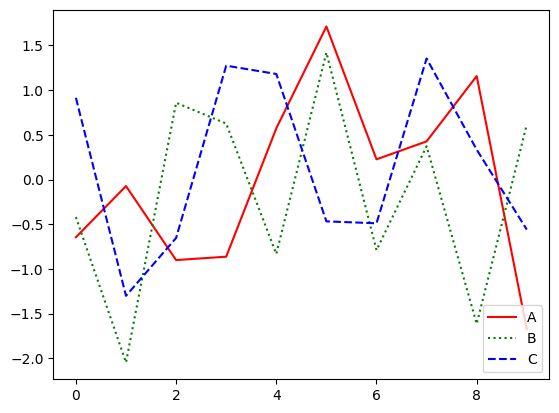

In [ ]:
ax.legend(loc = 'lower right');
fig

다중 플롯

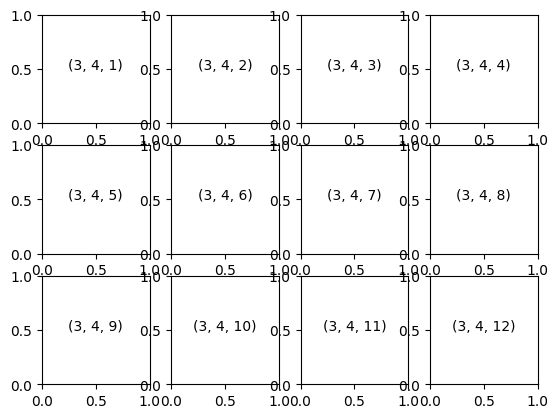

In [ ]:
for i in range(1, 13):
  plt.subplot(3, 4, i)
  plt.text(0.5,0.5, str((3,4,i)), ha='center')

<Axes: >

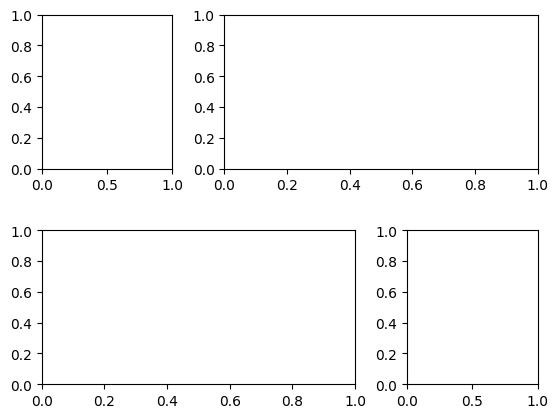

In [ ]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.4)
plt.subplot(grid[0,0])
plt.subplot(grid[0,1:])
plt.subplot(grid[1,:2])
plt.subplot(grid[1,2])

플롯 종류
- bar : 막대 플롯 생성
- boxplot : 상자 및 수염 플롯 생성
- hist : 히스토그램 플롯
- pie : 파이 챠트
- plot : 라인 플롯
- scatter : 산점도

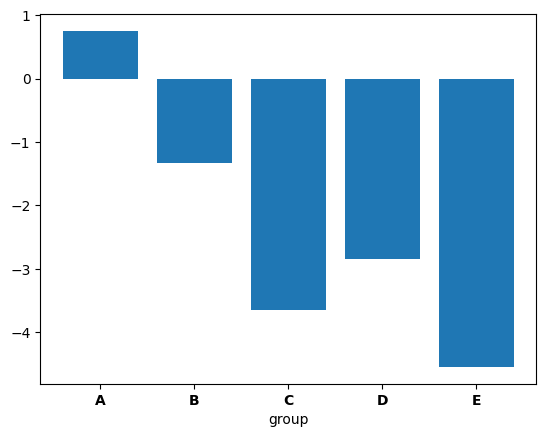

In [ ]:
# 막대 플롯
height = [np.random.randn()*i for i in range(1, 6)]
names = ['A', 'B', 'C', 'D', 'E']
y_pos = np.arange(len(names))
plt.bar(y_pos, height)
plt.xticks(y_pos, names, fontweight='bold')
plt.xlabel('group');

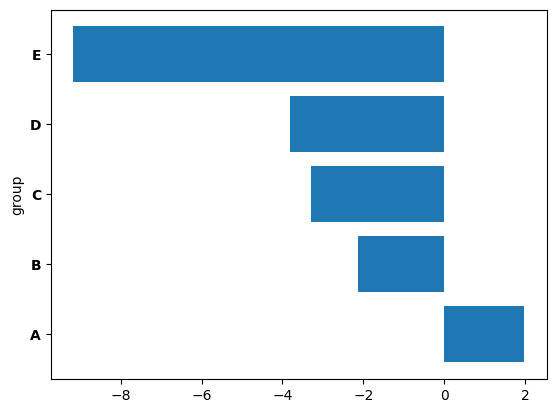

In [ ]:
height = [np.random.randn()*i for i in range(1, 6)]
names = ['A', 'B', 'C', 'D', 'E']
y_pos = np.arange(len(names))
plt.barh(y_pos, height)
plt.yticks(y_pos, names, fontweight='bold')
plt.ylabel('group');

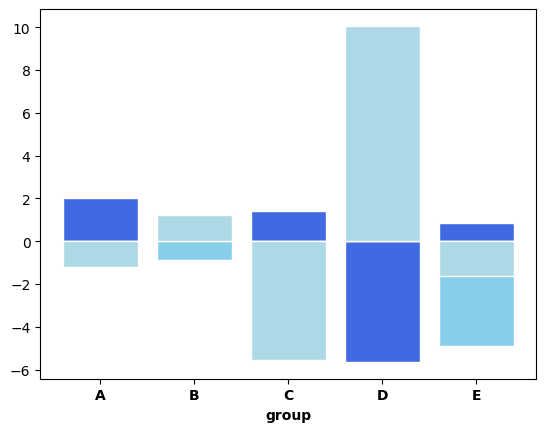

In [ ]:
bars1 = [np.random.randn()*i for i in range(1, 6)]
bars2 = [np.random.randn()*i for i in range(1, 6)]
bars3 = [np.random.randn()*i for i in range(1, 6)]
# bars = np.add(bars1, bars2).tolist()

r = [0, 1, 2, 3, 4]
names = ['A', 'B', 'C', 'D', 'E']

plt.bar(r, bars1, color='royalblue', edgecolor='white')
plt.bar(r, bars2, color='skyblue', edgecolor='white')
plt.bar(r, bars3, color='lightblue', edgecolor='white')

plt.xlabel('group', fontweight='bold')
plt.xticks(r, names, fontweight='bold');

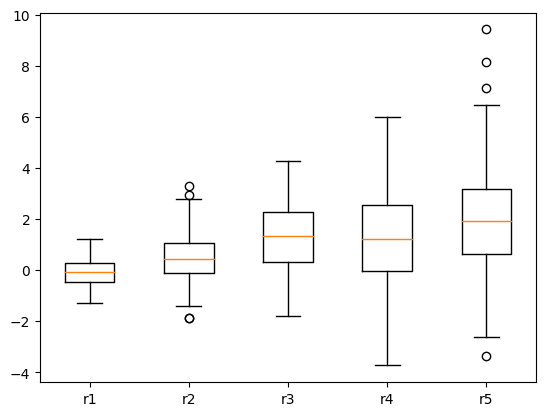

In [ ]:
# 박스 플롯
r1 = np.random.normal(loc=0, scale=0.5, size=100)
r2 = np.random.normal(loc=0.5, scale=1, size=100)
r3 = np.random.normal(loc=1, scale=1.5, size=100)
r4 = np.random.normal(loc=1.5, scale=2, size=100)
r5 = np.random.normal(loc=2, scale=2.5, size=100)

f, ax = plt.subplots(1,1)
ax.boxplot((r1, r2, r3, r4, r5))
ax.set_xticklabels(['r1', 'r2', 'r3', 'r4', 'r5']);

<ipython-input-155-70d4060bcac1>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, alpha=0.2, cmap='viridis')


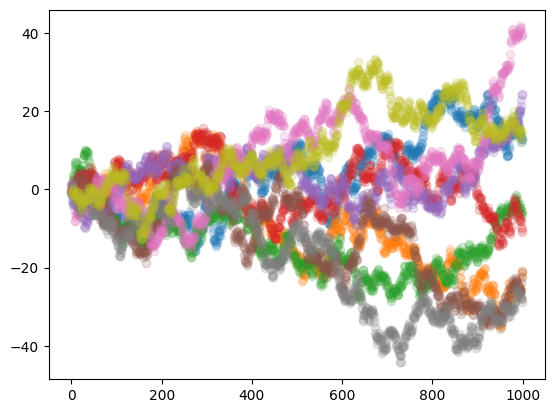

In [ ]:
# scatter plot 산점도
for i in range(9):
  x = np.arange(1000)
  y = np.random.randn(1000).cumsum()
  plt.scatter(x, y, alpha=0.2, cmap='viridis')

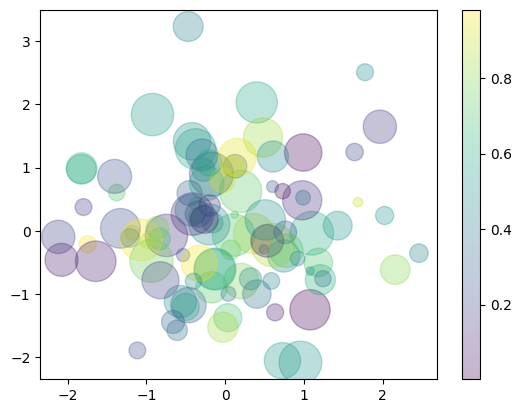

In [ ]:
x = np.random.randn(100)
y = np.random.randn(100)
colors = np.random.rand(100)
sizes = 1000*np.random.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar();

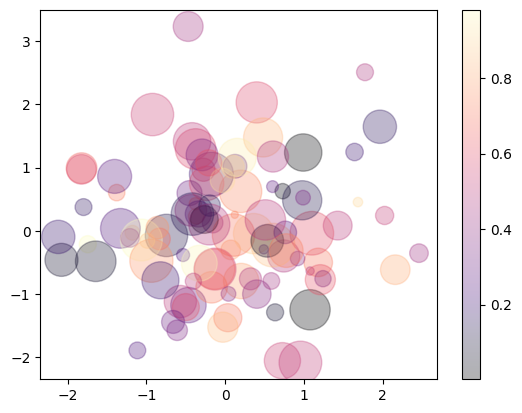

In [ ]:
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='magma')
plt.colorbar();

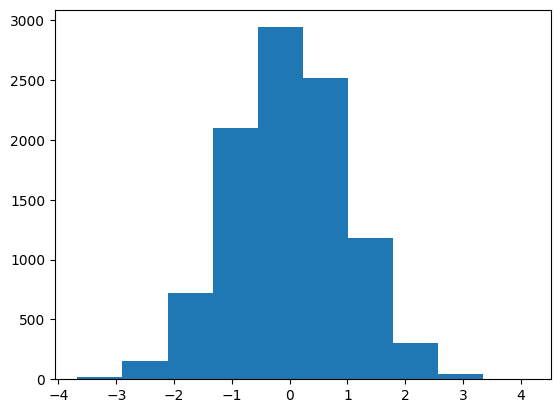

In [ ]:
# 히스토 그램
data = np.random.randn(10000)
plt.hist(data);

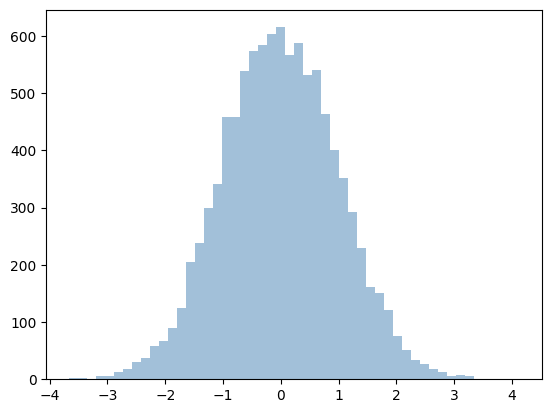

In [ ]:
plt.hist(data, bins=50, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none');

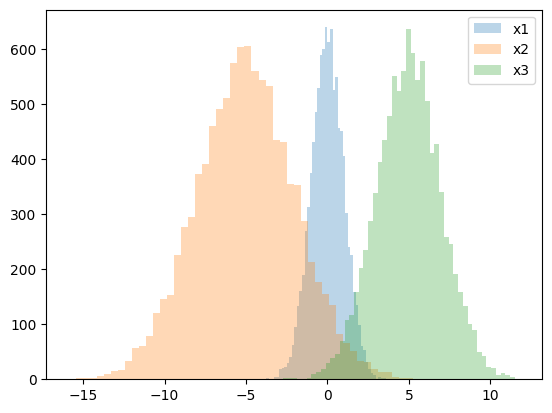

In [ ]:
x1 = np.random.normal(0, 1, 10000)
x2 = np.random.normal(-5, 3, 10000)
x3 = np.random.normal(5, 2, 10000)
d = dict(histtype='stepfilled', alpha=0.3, bins=50)

plt.hist(x1, **d)
plt.hist(x2, **d)
plt.hist(x3, **d)
plt.legend(['x1', 'x2', 'x3']);

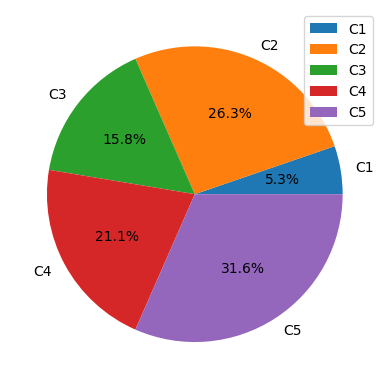

In [ ]:
# 파이 챠트
data = [10,50,30,40,60]
categories = ['C1', 'C2', 'C3', 'C4', 'C5']
plt.pie(data, labels=categories, autopct='%0.1f%%')
plt.legend(categories);

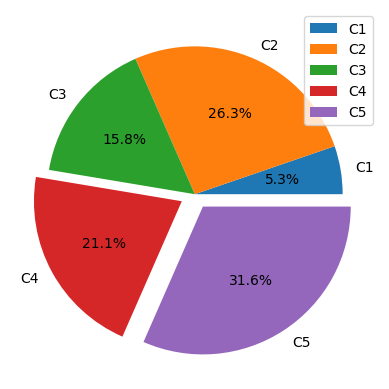

In [ ]:
explode = [0.0,0.0,0.0,0.1,0.1]
plt.pie(data,explode=explode, labels=categories, autopct='%0.1f%%')
plt.legend(categories);